## CZ2001 Algorithms Example Class 3
3B: Integration of Mergesort and Insertion Sort

In [94]:
import time
import random
import pandas as pd
import matplotlib.pyplot as plt

## MergeSort

In [95]:
class MergeSort:
    key_comp = 0
    
    def run(self, arr):
        self.key_comp = 0
        start = time.perf_counter()
        sorted_arr = self.mergeSort(arr)
        end = time.perf_counter()

        # print("\nYour sorted array is: " + str(sorted_arr))
        # print("It took you " + str((end-start)*100) + " * 10^-2 seconds to complete the sort")
        
    def run_time(self, arr):
        self.key_comp = 0
        start = time.perf_counter()
        sorted_arr = self.mergeSort(arr)
        del sorted_arr
        end = time.perf_counter()
        return end-start
        
    def mergeSort(self, arr):
        # Base case
        if len(arr) <= 1:
            return arr

        # Divide the array into two halves
        mid = len(arr) // 2
        left_arr = arr[:mid] # Partition left array, not inclusive of the middle index
        right_arr = arr[mid:] # Partition right array, inclusive of the middle index

        # Recursively divide the arrays into 2 until the base case
        left_arr = self.mergeSort(left_arr)
        right_arr = self.mergeSort(right_arr)
        return self.merge(left_arr, right_arr)

    # Merge function
    def merge(self, left_arr, right_arr):
        return_arr = []

        # While either the left array or right array still has elements remaining
        while left_arr and right_arr:
            # Compare the first element of the left array to the first element of the right array
            if left_arr[0] < right_arr[0]:
                return_arr.append(left_arr[0]) # Add the element to the end of the array to be returned
                left_arr.pop(0) # Remove the element from the left array
            else:
                return_arr.append(right_arr[0])
                right_arr.pop(0)
            self.key_comp += 1

        if left_arr:
            return_arr.extend(left_arr)
        else:
            return_arr.extend(right_arr)

        return return_arr

## Modified MergeSort (extends MergeSort)

In [96]:
class ModifiedMergeSort(MergeSort):
    #key_comp = 0    # in parent class
    
    def __init__(self, S):
        self.S_val = S
        
    def set_S(self, S):
        self.S_val = S
    
    # Override
    def mergeSort(self, arr):
        arr_length = len(arr)
        
        # Base case
        if arr_length <= 1:
            return arr
        
        # If the size of the array is smaller than S, carry out insertion sort
        elif arr_length <= self.S_val:
            return self.insertionSort(arr)
        
        # Else, carry out merge sort
        else:
            # Divide the array into two halves
            mid = len(arr) // 2
            left_arr = arr[:mid] # Partition left array, not inclusive of the middle index
            right_arr = arr[mid:] # Partition right array, inclusive of the middle index

            # Recursively divide the arrays into 2 until the base case
            left_arr = self.mergeSort(left_arr)
            right_arr = self.mergeSort(right_arr)
            return self.merge(left_arr, right_arr)
        
    def insertionSort(self, arr):
        arr_length = len(arr)
        for i in range(1, arr_length):
            for j in range(i, 0, -1):
                self.key_comp += 1
                if arr[j] < arr[j-1]:
                    temp = arr[j]
                    arr[j] = arr[j-1]
                    arr[j-1] = temp
                else:
                    break
        return arr

## Helper Methods to Create Array
Ways of creating array:
- User input
- n number of random integers
- n number of integers in decreasing order
- n number of integers in worst case order for merge sort

In [97]:
def populate_array_input():
    arr = []
    while True:
        val = input("Enter a number, type a non-number to quit: ")
        try:
            int(val)
        except ValueError:
            break
        arr.append(val)
    return arr


def populate_array_random(arr_length):
    arr = []
    for i in range(int(arr_length)):
        arr.append(random.randint(-100000, 100000))
    return arr


def populate_array_decreasing(arr_length):

    arr = []
    for i in range(int(arr_length)):
        arr.append(random.randint(-100000, 100000))
    arr.sort(reverse=True)
    return arr


# function to arrange array into worst case
# array must already be sorted in ascending order
def worstMergeSort(sorted_arr):
    # Base case
    if len(sorted_arr) <= 1:
        return sorted_arr

    # Partition left array with all the terms with even index
    left_arr = []
    for i in range(0, len(sorted_arr), 2):
        left_arr.append(sorted_arr[i])

    # Partition right array with all the terms with odd index
    right_arr = []
    for i in range(1, len(sorted_arr), 2):
        right_arr.append(sorted_arr[i])

    # Recursively divide the arrays into 2 until the base case for i in range(int(arr_length)):
    left_arr = worstMergeSort(left_arr)
    right_arr = worstMergeSort(right_arr)
    return left_arr + right_arr


def populate_array_worst(arr_length):
    arr = []
    for i in range(int(arr_length)):
        arr.append(random.randint(-100000, 100000))
    arr.sort()
    worst_arr = worstMergeSort(arr)
    return worst_arr

## Run MergeSort

In [98]:
mSort = MergeSort()
arr = populate_array_input()
mSort.run(arr)

Enter a number, type a non-number to quit: 


In [99]:
mmSort = ModifiedMergeSort(5)
arr = populate_array_random(23)
mmSort.run(arr)

In [100]:
mmSort.set_S(3)
arr =populate_array_random(23)
mmSort.run(arr)

In [101]:
arr = populate_array_decreasing(23)
mmSort.run(arr)

# Get runtimes for different values of S and n

In [102]:
def iterate_sort_random_time(arr_length):
    # generate a random array of size n
    time_taken_list = []
    arr = populate_array_random(arr_length)
    for i in range(0, arr_length+1):
        mms = ModifiedMergeSort(i)
        #get average of 100 runs
        total_runtime = 0
        for j in range(100):
            total_runtime += mms.run_time(arr)
        average_runtime_100 = total_runtime/100
        time_taken_list.append(average_runtime_100)
    return time_taken_list

def iterate_sort_worst_time(arr_length):
    # generate a random array of size n
    time_taken_list = []
    arr = populate_array_worst(arr_length)
    for i in range(0, arr_length+1):
        mms = ModifiedMergeSort(i)
        #get average of 100 runs
        total_runtime = 0
        for j in range(100):
            total_runtime += mms.run_time(arr)
        average_runtime_100 = total_runtime/100
        time_taken_list.append(average_runtime_100)
    return time_taken_list

def iterate_sort_random_keycomp(arr_length):
    # generate a random array of size n
    keycomp_list = []
    arr = populate_array_random(arr_length)
    for i in range(0, arr_length+1):
        mms = ModifiedMergeSort(i)
        keycomp = mms.key_comp
        keycomp_list.append(keycomp)
    return keycomp_list

def iterate_sort_worst_keycomp(arr_length):
    # generate a random array of size n
    keycomp_list = []
    arr = populate_array_worst(arr_length)
    for i in range(0, arr_length+1):
        mms = ModifiedMergeSort(i)
        mms.run(arr)
        keycomp = mms.key_comp
        keycomp_list.append(keycomp)
    return keycomp_list

Enter the value of n:
70
     S  average case  worst case
0    0      0.000236    0.000242
1    1      0.000216    0.000244
2    2      0.000217    0.000236
3    3      0.000211    0.000232
4    4      0.000191    0.000218
..  ..           ...         ...
66  66      0.000321    0.000295
67  67      0.000326    0.000296
68  68      0.000321    0.000310
69  69      0.000321    0.000300
70  70      0.000040    0.000040

[71 rows x 3 columns] 

     S  average case  worst case
70  70       0.00004     0.00004
     S  average case  worst case
70  70       0.00004     0.00004


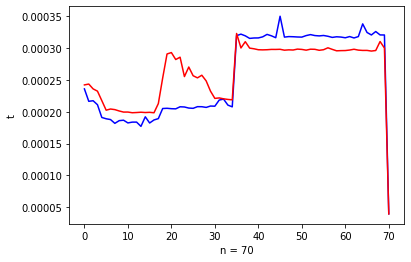

In [103]:
n = int(input("Enter the value of n:\n"))
average_runtime = iterate_sort_random_time(n)
worst_runtime = iterate_sort_worst_time(n)


df = pd.DataFrame({"S": range(0, n+1), "average case": average_runtime, "worst case": worst_runtime})
print(df,"\n")

#to find row with the fastest time
print(df.loc[df["average case"] == df["average case"].min()])
print(df.loc[df["worst case"] == df["worst case"].min()])

#plot average case in blue and worst case in red in increasing S for n
plt.plot(df["S"], df["average case"], 'b', df["S"], df["worst case"], 'r')
plt.ylabel('t')
plt.xlabel('n = '+ str(n))
plt.show()


### Based on keycomp instead of time

In [104]:
for n in range(0,101,10):
    average_keycomp = iterate_sort_random_keycomp(n)
    worst_keycomp = iterate_sort_worst_keycomp(n)

    df = pd.DataFrame({"S": range(0, n + 1), "average case": average_keycomp, "worst case": worst_keycomp})
    print("n = ", n)
    print(df.loc[df["average case"] == df["average case"].min()])
    print(df.loc[df["worst case"] == df["worst case"].min()])
print(df)

n =  0
   S  average case  worst case
0  0             0           0
   S  average case  worst case
0  0             0           0
n =  10
     S  average case  worst case
0    0             0          25
1    1             0          25
2    2             0          25
3    3             0          23
4    4             0          23
5    5             0          25
6    6             0          25
7    7             0          25
8    8             0          25
9    9             0          25
10  10             0          27
   S  average case  worst case
3  3             0          23
4  4             0          23
n =  20
     S  average case  worst case
0    0             0          69
1    1             0          69
2    2             0          69
3    3             0          65
4    4             0          65
5    5             0          69
6    6             0          69
7    7             0          69
8    8             0          69
9    9             0          69
1